In [45]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [47]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as kb

print(tf.__version__)

2.2.0-rc4


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
data = pd.read_csv ('/content/DABUR.NS.csv')
temp=pd.DataFrame(data, columns= ['Open','High','Low','Close','Adj Close','Volume']).dropna()
ON=np.array(temp.iloc[1:len(temp),0])
res=np.array(temp.iloc[11:len(temp),3])
temp.drop(temp.index[len(temp)-1], inplace=True)
temp.drop(columns=['Open'], inplace=True)
temp['ON']=ON
a1=np.array(temp.iloc[9:len(temp)-1])
a2=np.array(temp.iloc[8:len(temp)-2])
a3=np.array(temp.iloc[7:len(temp)-3])
a4=np.array(temp.iloc[6:len(temp)-4])
a5=np.array(temp.iloc[5:len(temp)-5])
a6=np.array(temp.iloc[4:len(temp)-6])
a7=np.array(temp.iloc[3:len(temp)-7])
a8=np.array(temp.iloc[2:len(temp)-8])
a9=np.array(temp.iloc[1:len(temp)-9])
a10=np.array(temp.iloc[0:len(temp)-10])
temp.drop(temp.index[0:10], inplace=True)

In [50]:
temp['O1'], temp['H1'], temp['L1'],temp['C1'], temp['AC1'], temp['V1'],temp['O2'], temp['H2'], temp['L2'],temp['C2'], temp['AC2'], temp['V2'],temp['O3'], temp['H3'], temp['L3'],temp['C3'], temp['AC3'], temp['V3'] = [a1[:,0],a1[:,1],a1[:,2],a1[:,3],a1[:,4],a1[:,5], a2[:,0],a2[:,1],a2[:,2],a2[:,3],a2[:,4],a2[:,5], a3[:,0],a3[:,1],a3[:,2],a3[:,3],a3[:,4],a3[:,5]]
temp['O4'], temp['H4'], temp['L4'],temp['C4'], temp['AC4'], temp['V4'],temp['O5'], temp['H5'], temp['L5'],temp['C5'], temp['AC5'], temp['V5'],temp['O6'], temp['H6'], temp['L6'],temp['C6'], temp['AC6'], temp['V6'] = [a4[:,0],a4[:,1],a4[:,2],a4[:,3],a4[:,4],a4[:,5], a5[:,0],a5[:,1],a5[:,2],a5[:,3],a5[:,4],a5[:,5], a6[:,0],a6[:,1],a6[:,2],a6[:,3],a6[:,4],a6[:,5]]
temp['O7'], temp['H7'], temp['L7'],temp['C7'], temp['AC7'], temp['V7'],temp['O8'], temp['H8'], temp['L8'],temp['C8'], temp['AC8'], temp['V8'],temp['O9'], temp['H9'], temp['L9'],temp['C9'], temp['AC9'], temp['V9'] = [a7[:,0],a7[:,1],a7[:,2],a7[:,3],a7[:,4],a7[:,5], a8[:,0],a8[:,1],a8[:,2],a8[:,3],a8[:,4],a8[:,5], a9[:,0],a9[:,1],a9[:,2],a9[:,3],a9[:,4],a9[:,5]]
temp['O10'], temp['H10'], temp['L10'],temp['C10'], temp['AC10'], temp['V10'], temp['result']=[a10[:,0],a10[:,1],a10[:,2],a10[:,3],a10[:,4],a10[:,5],(res-temp['ON'])]
temp

,High,Low,Close,Adj Close,Volume,ON,O1,H1,L1,C1,AC1,V1,O2,H2,L2,C2,AC2,V2,O3,H3,L3,C3,AC3,V3,O4,H4,L4,C4,AC4,V4,O5,H5,L5,C5,AC5,V5,O6,H6,L6,C6,AC6,V6,O7,H7,L7,C7,AC7,V7,O8,H8,L8,C8,AC8,V8,O9,H9,L9,C9,AC9,V9,O10,H10,L10,C10,AC10,V10,result
10,8.815000,8.600000,8.625000,3.946297,447222.0,8.665,9.000000,8.735000,8.785000,4.019503,731904.0,8.815,8.950000,8.790000,8.815000,4.033228,833010.0,9.000,9.335000,8.815000,8.910000,4.076694,2063592.0,8.950000,9.325000,8.935000,8.985000,4.111011,1227414.0,9.115000,9.435000,9.000000,9.200000,4.209382,3198990.0,9.325000,9.000000,8.565000,8.815000,4.033228,3139716.0,9.250000,8.665000,8.540000,8.560000,3.916556,1589202.0,8.635000,8.640000,8.540000,8.585000,3.927994,1304064.0,8.660000,8.615000,8.525000,8.585000,3.927994,925272.0,8.585000,8.675000,8.535000,8.585000,3.927994,2331240.0,8.575000,-0.105000
11,8.665000,8.535000,8.560000,3.916556,563910.0,8.540,8.815000,8.600000,8.625000,3.946297,447222.0,8.665,9.000000,8.735000,8.785000,4.019503,731904.0,8.815,8.950000,8.790000,8.815000,4.033228,833010.0,9.000000,9.335000,8.815000,8.910000,4.076694,2063592.0,8.950000,9.325000,8.935000,8.985000,4.111011,1227414.0,9.115000,9.435000,9.000000,9.200000,4.209382,3198990.0,9.325000,9.000000,8.565000,8.815000,4.033228,3139716.0,9.250000,8.665000,8.540000,8.560000,3.916556,1589202.0,8.635000,8.640000,8.540000,8.585000,3.927994,1304064.0,8.660000,8.615000,8.525000,8.585000,3.927994,925272.0,8.585000,-0.130000
12,8.575000,8.385000,8.410000,3.847924,1429992.0,8.515,8.665000,8.535000,8.560000,3.916556,563910.0,8.540,8.815000,8.600000,8.625000,3.946297,447222.0,8.665,9.000000,8.735000,8.785000,4.019503,731904.0,8.815000,8.950000,8.790000,8.815000,4.033228,833010.0,9.000000,9.335000,8.815000,8.910000,4.076694,2063592.0,8.950000,9.325000,8.935000,8.985000,4.111011,1227414.0,9.115000,9.435000,9.000000,9.200000,4.209382,3198990.0,9.325000,9.000000,8.565000,8.815000,4.033228,3139716.0,9.250000,8.665000,8.540000,8.560000,3.916556,1589202.0,8.635000,8.640000,8.540000,8.585000,3.927994,1304064.0,8.660000,-0.025000
13,8.540000,8.415000,8.490000,3.884527,647460.0,8.565,8.575000,8.385000,8.410000,3.847924,1429992.0,8.515,8.665000,8.535000,8.560000,3.916556,563910.0,8.540,8.815000,8.600000,8.625000,3.946297,447222.0,8.665000,9.000000,8.735000,8.785000,4.019503,731904.0,8.815000,8.950000,8.790000,8.815000,4.033228,833010.0,9.000000,9.335000,8.815000,8.910000,4.076694,2063592.0,8.950000,9.325000,8.935000,8.985000,4.111011,1227414.0,9.115000,9.435000,9.000000,9.200000,4.209382,3198990.0,9.325000,9.000000,8.565000,8.815000,4.033228,3139716.0,9.250000,8.665000,8.540000,8.560000,3.916556,1589202.0,8.635000,-0.100000
14,8.565000,8.415000,8.465000,3.873089,600246.0,8.500,8.540000,8.415000,8.490000,3.884527,647460.0,8.565,8.575000,8.385000,8.410000,3.847924,1429992.0,8.515,8.665000,8.535000,8.560000,3.916556,563910.0,8.540000,8.815000,8.600000,8.625000,3.946297,447222.0,8.665000,9.000000,8.735000,8.785000,4.019503,731904.0,8.815000,8.950000,8.790000,8.815000,4.033228,833010.0,9.000000,9.335000,8.815000,8.910000,4.076694,2063592.0,8.950000,9.325000,8.935000,8.985000,4.111011,1227414.0,9.115000,9.435000,9.000000,9.200000,4.209382,3198990.0,9.325000,9.000000,8.565000,8.815000,4.033228,3139716.0,9.250000,-0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,504.649994,487.250000,491.750000,491.750000,4482196.0,494.000,503.750000,494.500000,499.049988,499.049988,2376828.0,502.000,516.150024,497.049988,499.000000,499.000000,4322555.0,499.000,504.799988,495.549988,502.700012,502.700012,2801897.0,506.100006,503.000000,484.000000,498.200012,498.200012,4518995.0,498.500000,499.950012,482.500000,492.850006,492.850006,3233932.0,486.500000,515.000000,487.200012,490.100006,490.100006,3429703.0,492.399994,509.000000,492.14

In [0]:
train_dataset = temp.sample(frac=0.9,random_state=0)
test_dataset = temp.drop(train_dataset.index)

In [52]:
train_stats = train_dataset.describe()
train_stats.pop("result")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
High,3948.0,1.557348e+02,1.403177e+02,6.165000,45.912499,1.034750e+02,2.744625e+02,5.250000e+02
Low,3948.0,1.515578e+02,1.369633e+02,5.710000,44.011249,1.002750e+02,2.680250e+02,5.145500e+02
Close,3948.0,1.535652e+02,1.385688e+02,5.940000,45.018752,1.018250e+02,2.708875e+02,5.199000e+02
Adj Close,3948.0,1.465038e+02,1.389052e+02,2.914028,37.701292,9.351963e+01,2.616679e+02,5.199000e+02
Volume,3948.0,1.812408e+06,1.873639e+06,0.000000,783760.750000,1.270725e+06,2.211536e+06,3.602862e+07
...,...,...,...,...,...,...,...,...
H10,3948.0,1.504835e+02,1.361688e+02,5.710000,43.726251,1.000375e+02,2.673375e+02,5.145500e+02
L10,3948.0,1.524897e+02,1.377908e+02,5.940000,44.806251,1.014500e+02,2.706625e+02,5.199000e+02
C10,3948.0,1.454143e+02,1.380811e+02,2.914028,37.536909,9.311501e+01,2.610985e+02,5.199000e+02
AC10,3948.0,1.814576e+06,1.895969e+06,0.000000,791217.000000,1.284386e+06,2.212890e+06,3.602862e+07


In [0]:
train_labels = train_dataset.pop('result')
test_labels = test_dataset.pop('result')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def custom_loss(y_actual,y_pred):
    c1=kb.cast((kb.sign(y_actual)),dtype='float32') #and ((kb.less(y_pred,0.7*y_actual))or(kb.less(1.4*y_actual,y_pred)))
    c2=kb.cast((kb.less(y_pred,0.7*y_actual)),dtype='float32')
    c3=kb.cast((kb.less(1.4*y_actual,y_pred)),dtype='float32')
    c4=kb.cast((kb.sign(-y_actual)),dtype='float32') #and ((kb.less(0.7*y_actual,y_pred))or(kb.less(y_pred,1.4*y_actual)))
    c5=kb.cast((kb.less(0.7*y_actual,y_pred)),dtype='float32')
    c6=kb.cast((kb.less(y_pred,1.4*y_actual)),dtype='float32')
    return ((c1*c2+c1*c3+c4*c5+c4*c6)*9+1)*kb.square(y_actual-y_pred)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(150, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss=custom_loss,
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [95]:
model = build_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 150)               10050     
_________________________________________________________________
dense_40 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 151       
Total params: 32,851
Trainable params: 32,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-1.3533115 ],
       [-0.722494  ],
       [-0.9622725 ],
       [-1.2617843 ],
       [-0.4134894 ],
       [-0.2797492 ],
       [-0.38754976],
       [-0.4081778 ],
       [-1.32669   ],
       [-0.9969219 ]], dtype=float32)

In [96]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:10.5607,  mae:1.9387,  mse:10.5732,  val_loss:12.3615,  val_mae:1.9648,  val_mse:12.3659,  
....................................................................................................
Epoch: 100, loss:8.4740,  mae:1.7245,  mse:8.7221,  val_loss:12.7242,  val_mae:2.1068,  val_mse:12.9257,  
....................................................................................................
Epoch: 200, loss:6.8130,  mae:1.5933,  mse:7.3469,  val_loss:14.5518,  val_mae:2.2778,  val_mse:14.7798,  
....................................................................................................
Epoch: 300, loss:6.5191,  mae:1.5948,  mse:7.2259,  val_loss:15.3093,  val_mae:2.3602,  val_mse:15.5206,  
....................................................................................................
Epoch: 400, loss:5.4765,  mae:1.5477,  mse:6.5037,  val_loss:19.3006,  val_mae:2.5244,  val_mse:20.7150,  
............................................................

In [97]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,4.770063,1.503876,6.115461,18.755030,2.596197,18.965931,995
996,4.738311,1.495028,6.046109,18.253365,2.584069,18.465826,996
997,4.588095,1.484440,5.836560,21.997620,2.692585,22.508135,997
998,4.916369,1.506991,6.105211,17.825413,2.561862,18.231382,998
999,4.366914,1.486865,5.705636,19.127352,2.553156,19.608488,999


Text(0, 0.5, 'Loss [Close]')

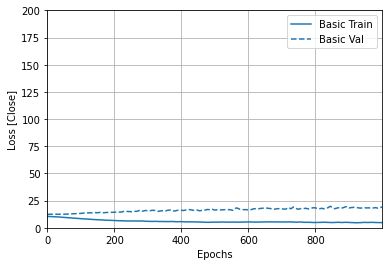

In [98]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 200])
plt.ylabel('Loss [Close]')

Text(0, 0.5, 'MSE [Close^2]')

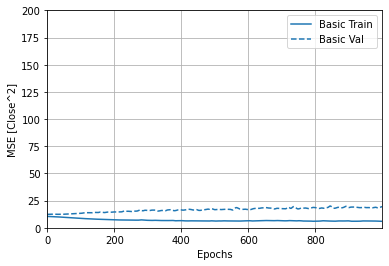

In [99]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 200])
plt.ylabel('MSE [Close^2]')

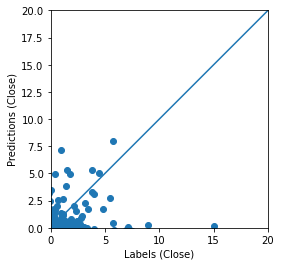

In [101]:
test_dataset['Pred'] = model.predict(normed_test_data).flatten()
test_dataset['labels']=test_labels

a = plt.axes(aspect='equal')
plt.scatter(test_dataset['labels'], test_dataset['Pred'])
plt.xlabel('Labels (Close)')
plt.ylabel('Predictions (Close)')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

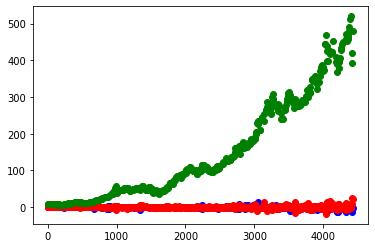

In [102]:
plt.scatter(test_dataset.index,test_dataset.Pred, color="blue")
plt.scatter(test_dataset.index,test_dataset.labels, color="red")
plt.scatter(test_dataset.index,test_dataset.ON, color="green")
#new=test_dataset.index+1
#lims = [500, 550]
#plt.ylim(lims)

In [0]:
test_dataset['Height'] = test_dataset['labels']

In [104]:
test_dataset['Long'] = np.where(((test_dataset['labels']>=0) & ((test_dataset['Pred']>= (0.7*test_dataset['Height']))&(test_dataset['Pred']<= (1.4*test_dataset['Height'])))) 
                     , 1, np.nan)
test_dataset[test_dataset.Long==1].shape[0]

19

In [105]:
test_dataset['Short'] = np.where(((test_dataset['labels']<=0) & ((test_dataset['Pred']>= (1.4*test_dataset['Height']))&(test_dataset['Pred']<= (0.7*test_dataset['Height'])))) 
                     , 1, np.nan)
test_dataset[test_dataset.Short==1].shape[0]

21

In [106]:
Accuracy=(test_dataset[test_dataset.Short==1].shape[0]+test_dataset[test_dataset.Long==1].shape[0])/len(test_dataset)
Accuracy

0.09111617312072894

In [26]:
test_dataset['Long'] = np.where(((test_dataset['labels']>=test_dataset['ON']) & (test_dataset['Pred']>= test_dataset['ON'])) 
                     , 1, np.nan)
test_dataset[test_dataset.Long==1].shape[0]

148

In [27]:
test_dataset['Short'] = np.where(((test_dataset['labels']<=test_dataset['ON']) & (test_dataset['Pred']<= test_dataset['ON'])) 
                     , 1, np.nan)
test_dataset[test_dataset.Short==1].shape[0]

97

In [28]:
Accuracy=(test_dataset[test_dataset.Short==1].shape[0]+test_dataset[test_dataset.Long==1].shape[0])/len(test_dataset)
Accuracy

0.5580865603644647